Queremos duas coisas: 
- lista de tuplas para representar as adjacencias entres nos do grafo
- dicionario que contem os pares nos: valor relativos ao respetivo grafo

Quantidade de noś no grafo: (Se b=2 e d=3)
- d = 0 -> $b^0$ = 1
- d = 1 -> $b^1$ = 2
- d = 2 -> $b^2$ = 4
- d = 3 -> $b^3$ = 8

- d = n -> $b^n$

Por cada nivel. Para determinada depth, temos que somar a totalidade do que foi demonstrado em cima

n = 1 + $b^1$ + $b^2$ + $b^3$ + $b^{max}$


In [28]:
#library para plot do grafo
import networkx as nx

#layout tipo arvore
from networkx.drawing.nx_pydot import graphviz_layout

#library para plot do grafo
import matplotlib.pyplot as plt

#biblioteca random
import random

In [29]:
def graf_id_list(b,d):
    num_nodes = int((pow(b,d+1)-1)/(b-1))
    list_of_nodes = [i for i in range(1,num_nodes+1)]
    return list_of_nodes

In [30]:
def generate_adjancies_list(adjacencias,node_list,parent_id,branching_factor,depth,current_depth):
    if current_depth == depth:
        return adjacencias
    for i in range(1, branching_factor + 1):
        filho_id = node_list.pop(0)
        adjacencias.append((parent_id,filho_id))
        generate_adjancies_list(adjacencias,node_list,filho_id,branching_factor,depth,current_depth+1)
    return adjacencias

In [31]:
_depth = 2
_branching_factor = 2

_node_id_list = graf_id_list(_branching_factor,_depth)
print(_node_id_list)
_pai = _node_id_list.pop(0)

adjancies = generate_adjancies_list([],_node_id_list,_pai,_branching_factor,_depth,0)
print(adjancies)

[1, 2, 3, 4, 5, 6, 7]
[(1, 2), (2, 3), (2, 4), (1, 5), (5, 6), (5, 7)]


## Exercício 1:

Gerar grafos aleatórios com branching factor b e profundidade d com valor para os elementos da sua base aleatórios de -10 até 10.

a) Para um dado depth factor `d` e para um Branching factor `b`, gere um codigo em python que produza um grafo, representando-o no formato lista de tuplas.

Ex: `[(1,2),(1,4), (4,5)....]`

Para o caso acima o nó 1 tem uma ligação com o nó dois e 4. O nó 4 tem uma ligação com o nó 5.

b) Em seguinda atribua um valor (utility) ou um valor para os nós na base do grafo. Use um dicionário `labels_dic` para faze-lo. Comece aqui a trabalhar com a biblioteca `networkx` ela é especializada em grafos. (Dica: pesquise o método `.degree` de um grafo)

Ex: `{1:'', 2:'', 9:'',...}`

In [32]:
# cria o node
G = nx.DiGraph()

G.add_edges_from(adjancies)

labels_dic = {node:random.randint(-10, 10) if G.degree[node]==1 else None for node in G}

labels_dic

{1: None, 2: None, 3: 1, 4: 7, 5: None, 6: -9, 7: -6}

c) Agora vamos tentar imprimir o que gerou. Também faz parte tentar receber funções de outros programadores e tentar atender os parametros de entrada. Utilizando a funcao dada abaixo atenda os requisitos do input e veja o que acontece.

Nodes: [(1, {'value': None}), (2, {'value': None}), (3, {'value': 1}), (4, {'value': 7}), (5, {'value': None}), (6, {'value': -9}), (7, {'value': -6})]
Edges: [(1, 2), (1, 5), (2, 3), (2, 4), (5, 6), (5, 7)]


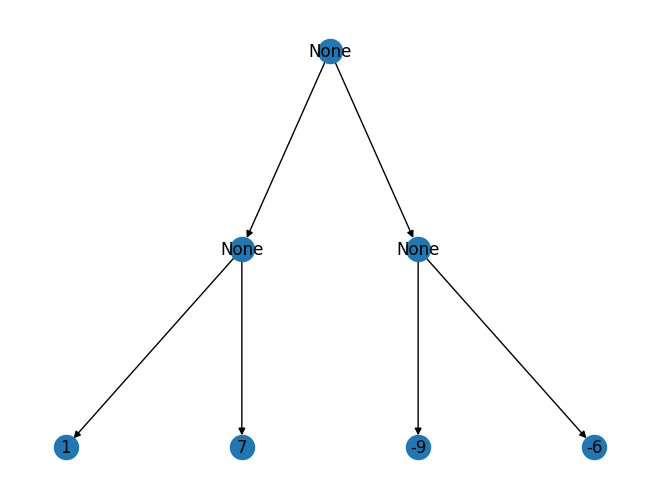

In [33]:
#funcao que printa o grafo
def print_grafo(graph,labels_dic,values=False):

  #parametros e entrada
  ######
  #list_edges deve ser uma lista de tuplas
  #list_edges = [(1,2),(3,4)....]
  #Cada edge representa uma ligacao entre nós
  #values (default False) é se quer imprimir o grafo com os nomes dos nós ou com seus valores atribuidos
  ######
  #labels_dic é um dicionário com o peso de cada nó
  #labels_dic = {1:4,2:2,3:5,....}

  #cria o node
  G = nx.DiGraph()

  #insere os nós e os edges
  G.add_edges_from(graph)

  #gera a posicao e organiza em arvore
  pos = graphviz_layout(G, prog="dot")

  for node in G:
    G.nodes[node]["value"] = labels_dic[node]

  # Printa a informacao do grafo (opcional)
  print("Nodes:", G.nodes(data=True))
  print("Edges:", G.edges())

  #faz plot
  if values:
    nx.draw(G, pos,with_labels=True,labels=labels_dic)
  else:
    nx.draw(G,pos,with_labels=True)

  plt.draw()
  plt.show()

  return G


G = print_grafo(adjancies,labels_dic,True)

Nodes: [(1, {'value': None}), (2, {'value': None}), (3, {'value': 1}), (4, {'value': 7}), (5, {'value': None}), (6, {'value': -9}), (7, {'value': -6})]
Edges: [(1, 2), (1, 5), (2, 3), (2, 4), (5, 6), (5, 7)]


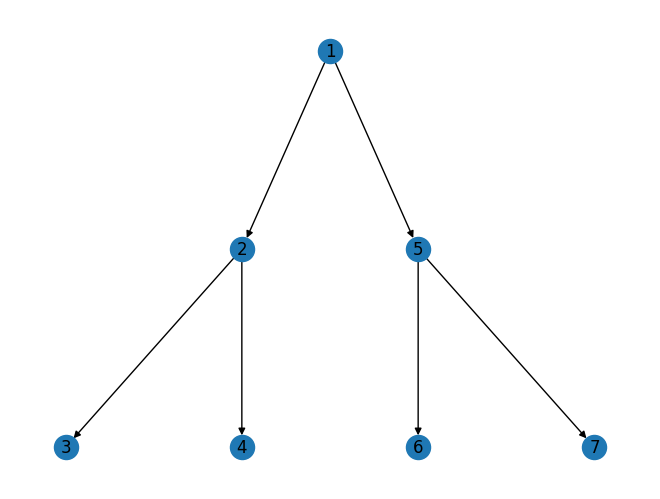

In [34]:
G = print_grafo(adjancies,labels_dic,False)

## Exercício 2:

Agora ja tem um bom grafo para trabalhar com minimax. crie uma função que receba como parâmetro o grafo que você criou acima, nó alvo e qual comportamento de jogador esse nó deve ter (max ou min). Sua função deve retornar qual jogada o jogador deve fazer logo a seguir o nó alvo.

In [35]:
'''

Pseudo-code for MinMax Algorithm:
    
function minimax(node, depth, maximizingPlayer) is  
	if depth == 0 or node is a terminal node then  
		return static evaluation of node  
  
	if MaximizingPlayer then // for Maximizer Player  
		maxEva = -infinity            
 		for each child of node do  
 			eva = minimax(child, depth - 1, false)  
			maxEva = max(maxEva,eva) // gives Maximum of the values  
		return maxEva  

	else // for Minimizer player  
 		minEva = +infinity   
 		for each child of node do  
 			eva = minimax(child, depth - 1, true)  
 			minEva = min(minEva, eva) //gives minimum of the values  
 		return minEva  

 '''


def minimax(graf, node, depth, maximizingPlayer):
    def _minimax(graf, current_node, current_depth, maximizingPlayer):
        # Check for terminal condition: if depth is 0 or node has a value
        # Se depth = 0 
        # ou se existe valor no current node -> devolve o valor
        if current_depth == 0 or "value" in graf.nodes[current_node]:
            return graf.nodes[current_node].get("value", 0) 

        if maximizingPlayer:
            best_value = float("-inf")
            for child in graf.successors(current_node):
                val = _minimax(graf, child, current_depth - 1, False)
                best_value = max(best_value, val)
            return best_value
        else:
            best_value = float("inf")
            for child in graf.successors(current_node):
                val = _minimax(graf, child, current_depth - 1, True)
                best_value = min(best_value, val)
            return best_value

    # Main minimax call
    best_move = None
    if maximizingPlayer:
        best_value = float("-inf")
        for child in graf.successors(node):
            val = _minimax(graf, child, depth - 1, False)
            if best_value == float("-inf"):
                best_value = val
                best_move = child
			elif val > best_value:
                best_value = val
                best_move = child
    else:
        best_value = float("inf")
        for child in graf.successors(node):
            val = _minimax(graf, child, depth - 1, True)
            if best_value == float("inf") or val < best_value:
                best_value = val
                best_move = child

    return best_move, best_value





In [36]:
# Call minimax with a specific depth
best_move, best_value = minimax(G, 1, 3, True)
print(f"Best move: {best_move}, Best value: {best_value}")

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

In [ ]:
### Referencia print notebook lab

#Nodes: [(0, {'value': ''}), (1, {'value': ''}), (2, {'value': ''}), (3, {'value': 4}), (4, {'value': 3}), (5, {'value': ''}), (6, {'value': 6}), (7, {'value': 9}), (8, {'value': ''}), (9, {'value': ''}), (10, {'value': 7}), (11, {'value': 4}), (12, {'value': ''}), (13, {'value': -9}), (14, {'value': 10})]
#Edges: [(0, 1), (0, 8), (1, 2), (1, 5), (2, 3), (2, 4), (5, 6), (5, 7), (8, 9), (8, 12), (9, 10), (9, 11), (12, 13), (12, 14)]

## Exercício 3:

Que melhoria você propoe para o seu codigo acima? Discuta isso com o professor e veja sobre Alpha Beta Pruning. Implemente a rotina no seu código acima. O valor muda? O que muda?

In [ ]:
def minimax_ab(graf, node, depth, maximizingPlayer):
    def _minimax(graf, current_node, current_depth, maximizingPlayer,alpha,beta):
        # Check for terminal condition: if depth is 0 or node has a value
        # Se depth = 0 
        # ou se existe valor no current node -> devolve o valor
        if current_depth == 0 or "value" in graf.nodes[current_node]:
            return graf.nodes[current_node].get("value", 0) 

        if maximizingPlayer:
            best_value = float("-inf")
            for child in graf.successors(current_node):
                val = _minimax(graf, child, current_depth - 1, False, alpha, beta)
                best_value = max(best_value, val)
                alpha = max(alpha, best_value)
                if alpha <= beta:
                    # corta pois 'max' quer o maior possivel
                    break
            return best_value
        else:
            best_value = float("inf")
            for child in graf.successors(current_node):
                val = _minimax(graf, child, current_depth - 1, True, alpha, beta)
                best_value = min(best_value, val)
                beta = min(beta,best_value)
                if beta <= alpha:
                    # corta pois 'min' quer o maior possivel
                    break
            return best_value

    # Main minimax call
    best_move = None
    alpha = float("-inf")
    beta = float("inf")

    if maximizingPlayer:
        best_value = float("-inf")
        for child in graf.successors(node):
            val = _minimax(graf, child, depth - 1, False, alpha, beta)
            if val > best_value:
                best_value = val
                best_move = child
                alpha = max(alpha,best_value)
    else:
        best_value = float("inf")
        for child in graf.successors(node):
            val = _minimax(graf, child, depth - 1, True, alpha, beta)
            if val < best_value:
                best_value = val
                best_move = child   
                beta = min(beta,best_value)

    return best_move, best_value

In [ ]:
# call minimax with alpha beta prunning 

move,value = minimax_ab(G, 1, 2, True)
print(move)
print(value)

NameError: name 'G' is not defined